In [1]:
# In this assignment students have to transform iris data into 3 dimensions and plot a 3d
# chart with transformed dimensions and color each data point with specific class.

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Import iris dataset from sklearn
iris = datasets.load_iris()

In [3]:
# Print description about iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Features in the iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Target to the iris dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Update X ,y from iris dataset
X = iris.data
y = iris.target

In [7]:
# Create dataframe using X,y
df = pd.DataFrame(X,columns=iris.feature_names)

In [8]:
# Check header of the created dataframe
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Check first bottom 5 created dataframe
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
# Append target into DataFrame
df['target'] = iris.target

In [11]:
# Observe header after appending target in dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Ways of extracting values from the dataframe (just for example, not for exercise)
x_temp = df.loc[:, iris.feature_names].values
y_temp = df['target']

### Visualize data after transformation into lower dimension using PCA

###### 1) Apply PCA to transform iris dataset into 2D and visualize using Matplotlib

###### 2) Apply PCA to transform iris dataset into 3D and visualize using mpl_toolkits

### PCA for transformation into 2D data and visualization

In [13]:
# Apply PCA to transform iris dataset into 2D and visualization
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data=principalComponents2, columns=['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, df[['target']]], axis = 1)
finalDf2.head(5)

,principal component 1,principal component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [14]:
# Check the statistical values of the model transformed from 4D to 2D
print(f"components_ in the data transformed to 2D : \n{pca2.components_}\n")
print(f"explained_variance_ in the data transformed to 2D : \n{pca2.explained_variance_}\n")
print(f"score in the data transformed to 2D : \n{pca2.score(X)}")

components_ in the data transformed to 2D : 
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

explained_variance_ in the data transformed to 2D : 
[4.22824171 0.24267075]

score in the data transformed to 2D : 
-2.699796510675664


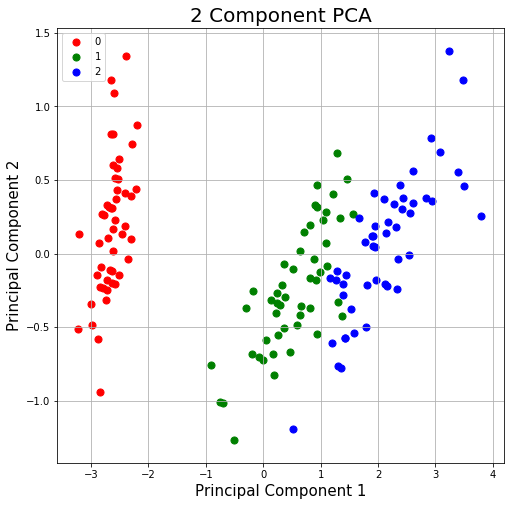

In [15]:
# Visualize the data into 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA for transformation into 3D data and visualization

In [16]:
# Apply PCA to transform iris dataset into 3D for visuallization
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf3 = pd.concat([principalDf3,df[['target']]], axis=1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


[Text(0,0,'principal component 3')]

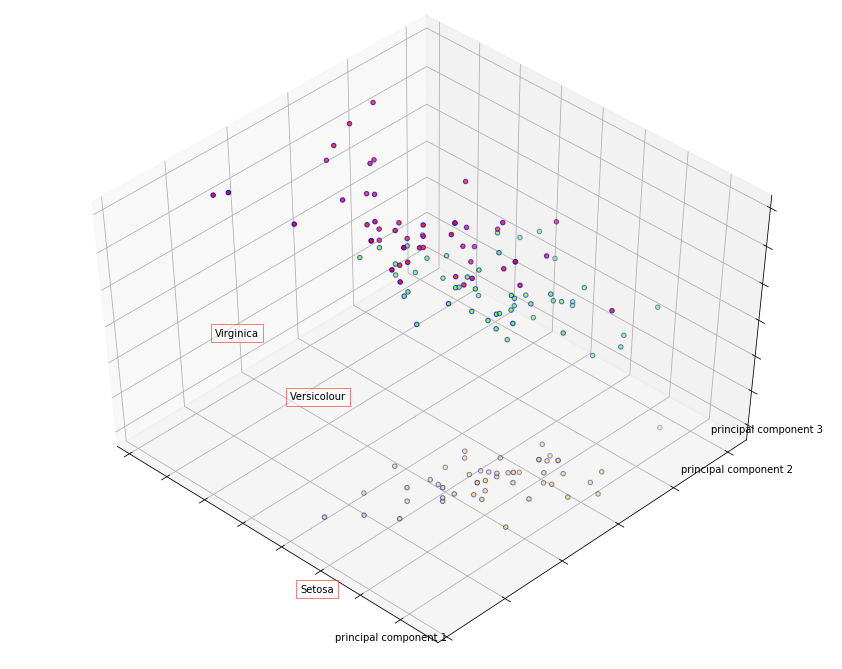

In [17]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='r', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y1, cmap=plt.cm.prism,
           edgecolor='b')

ax.w_xaxis.set_ticklabels(['principal component 1'])
ax.w_yaxis.set_ticklabels(['principal component 2'])
ax.w_zaxis.set_ticklabels(['principal component 3'])